In [26]:
import h3
import numpy as np
import pandas as pd
import pydeck as pdk
from cflp_function import *
from shapely.geometry import Polygon
from calculate_od import *

In [13]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [35]:
hex = pd.read_csv('./hex/d_to_inlet_hex_complete.csv')
get_fill_color(hex, "value", "magma")

Unnamed: 0             hex9      value           color
0               0  891f1600003ffff  6534.5710  [248, 117, 92]
1               1  891f160000bffff  6188.1636  [249, 125, 93]
2               2  891f160000fffff  6431.4520  [248, 119, 92]
3               3  891f1600013ffff  6781.6190  [246, 112, 91]
4               4  891f1600017ffff  7062.7300  [245, 106, 91]
...           ...              ...        ...             ...
14822       14822  891f16d5ec7ffff  8580.9550  [228, 78, 100]
14823       14823  891f16d5ecbffff  9025.3560  [221, 73, 104]
14824       14824  891f16d5ecfffff  8681.5710  [226, 77, 101]
14825       14825  891f16d5ed3ffff  9394.3200  [215, 69, 107]
14826       14826  891f16d5ed7ffff  8991.5190  [221, 73, 104]

[14827 rows x 4 columns]

In [36]:
# Define a layer to display on a map
layer = pdk.Layer(
    "H3HexagonLayer",
    hex,
    pickable=True,
    # stroked=True,
    filled=True,
    extruded=False,
    auto_highlight=True,
    opacity=0.6,
    get_hexagon="hex9",
    get_fill_color = "color", 
    get_line_color=[255, 255, 255],
    line_width_min_pixels=0.1
    )

# Set the viewport location
view_state = pdk.ViewState(longitude=6.747489560596507, latitude=52.316862707395394, zoom=9, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "Count: {value}"})
r.to_html("h3_layer.html")

In [10]:
from pysal.lib import weights
from libpysal.io import open as psopen

In [12]:
hex.head()

Unnamed: 0             hex9      value           color
0           0  891f1600003ffff  6534.5710  [248, 117, 92]
1           1  891f160000bffff  6188.1636  [249, 125, 93]
2           2  891f160000fffff  6431.4520  [248, 119, 92]
3           3  891f1600013ffff  6781.6190  [246, 112, 91]
4           4  891f1600017ffff  7062.7300  [245, 106, 91]

In [28]:

def cell_to_shapely_polygon(h3_index):
    """
    A function to convert H3 index to Shapely polygons

    """
    # hex_center_coords = h3.h3_to_geo(h3_index)
    coords = h3.h3_to_geo_boundary(h3_index)
    flipped = tuple(coord[::-1] for coord in coords)
    # center_point = Point(hex_center_coords)
    return Polygon(flipped) #, center_point

In [29]:
hex['geometry'] = hex['hex9'].apply(cell_to_shapely_polygon) # can change the function here

In [30]:
gdf = gpd.GeoDataFrame(hex, geometry='geometry', crs=4326)

In [31]:
gdf

Unnamed: 0             hex9      value           color  \
0               0  891f1600003ffff  6534.5710  [248, 117, 92]   
1               1  891f160000bffff  6188.1636  [249, 125, 93]   
2               2  891f160000fffff  6431.4520  [248, 119, 92]   
3               3  891f1600013ffff  6781.6190  [246, 112, 91]   
4               4  891f1600017ffff  7062.7300  [245, 106, 91]   
...           ...              ...        ...             ...   
14822       14822  891f16d5ec7ffff  8580.9550  [228, 78, 100]   
14823       14823  891f16d5ecbffff  9025.3560  [221, 73, 104]   
14824       14824  891f16d5ecfffff  8681.5710  [226, 77, 101]   
14825       14825  891f16d5ed3ffff  9394.3200  [215, 69, 107]   
14826       14826  891f16d5ed7ffff  8991.5190  [221, 73, 104]   

                                                geometry  
0      POLYGON ((7.03636 52.34060, 7.03663 52.33900, ...  
1      POLYGON ((7.03435 52.33791, 7.03462 52.33631, ...  
2      POLYGON ((7.03920 52.33848, 7.03947 52.33687, ...  
3      POLYGON ((7.03352 52.34273, 7.03380 52.34112, ...  
4      POLYGON ((7.03838 52.34329, 7.03865 52.34169, ...  
...                                                  ...  
14822  POLYGON ((6.50425 52.46852, 6.50454 52.46692, ...  
14823  POLYGON ((6.49742 52.46524, 6.49770 52.46364, ...  
14824  POLYGON ((6.50226 52.46583, 6.50255 52.46423, ...  
14825  POLYGON ((6.49656 52.47004, 6.49685 52.46844, ...  
14826  POLYGON ((6.50140 52.47063, 6.50169 52.46903, ...  

[14827 rows x 5 columns]

In [37]:
w_queen = weights.Queen.from_dataframe(gdf, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 3 islands with ids: 2412, 4229, 6677.
  warnings.warn(message)


In [42]:
w_queen.min_neighbors

0

In [43]:
w_queen.max_neighbors

6

In [44]:
w_queen.islands

[2412, 4229, 6677]

In [50]:
queen_card = pd.Series(w_queen.cardinalities)

(array([3.0000e+00, 1.7000e+01, 0.0000e+00, 9.9000e+01, 0.0000e+00,
        4.3100e+02, 8.3200e+02, 0.0000e+00, 1.3300e+03, 1.2115e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

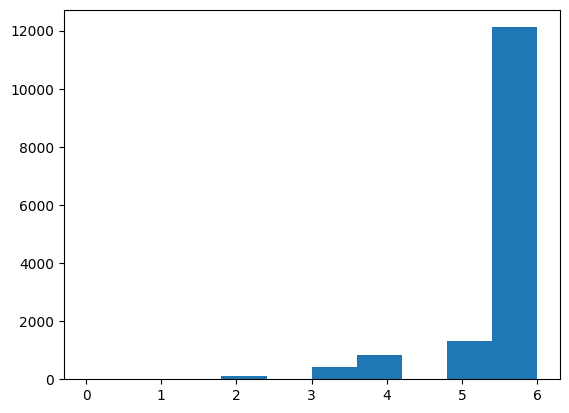

In [52]:
plt.hist(queen_card, bins=10)

In [46]:
w_rook = weights.Rook.from_dataframe(gdf, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 3 islands with ids: 2412, 4229, 6677.
  warnings.warn(message)


In [53]:
rook_card = pd.Series(w_rook.cardinalities)

(array([3.0000e+00, 1.7000e+01, 0.0000e+00, 9.9000e+01, 0.0000e+00,
        4.3100e+02, 8.3200e+02, 0.0000e+00, 1.3300e+03, 1.2115e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

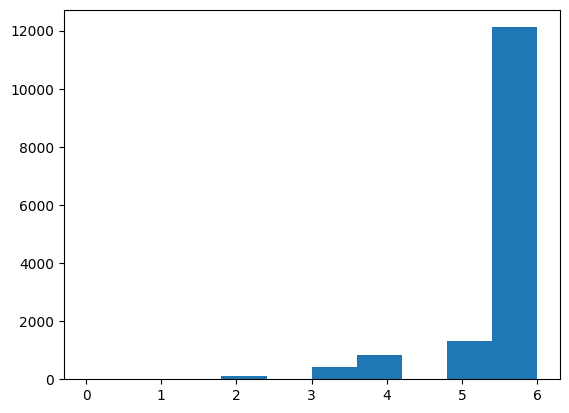

In [54]:
plt.hist(rook_card, bins=10)

In [55]:
# Row-standardize the queen matrix, 'R' = row, with all the neighbors of a given observation adding up to one.
w_queen.transform = 'R'

('WARNING: ', 2412, ' is an island (no neighbors)')
('WARNING: ', 4229, ' is an island (no neighbors)')
('WARNING: ', 6677, ' is an island (no neighbors)')


In [57]:
# Compute spatial lag 
lag = weights.lag_spatial(w_queen, gdf['value'])